# Importing Data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# This option ensures the graphs created are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Achievement 6'

In [4]:
#Import Dataframe
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Emissions Life Expectancy merged.csv'), index_col = False)

In [5]:
df. shape

(58807, 14)

In [6]:
df . head()

Unnamed: 0      Country country_code  Year  Total  Coal  Oil  Gas  Cement  \
0           0  Afghanistan          AFG  1750    0.0   0.0  0.0  0.0     0.0   
1           1  Afghanistan          AFG  1751    0.0   0.0  0.0  0.0     0.0   
2           2  Afghanistan          AFG  1752    0.0   0.0  0.0  0.0     0.0   
3           3  Afghanistan          AFG  1753    0.0   0.0  0.0  0.0     0.0   
4           4  Afghanistan          AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  Life Expectancy Life Expectancy category  
0      0.0    0.0         0.0              NaN                      NaN  
1      0.0    0.0         0.0              NaN                      NaN  
2      0.0    0.0         0.0              NaN                      NaN  
3      0.0    0.0         0.0              NaN                      NaN  
4      0.0    0.0         0.0              NaN                      NaN

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
# Check for missing values

df.isnull().sum()

Country                         0
country_code                    0
Year                            0
Total                           0
Coal                            0
Oil                             0
Gas                             0
Cement                          0
Flaring                         0
Other                           0
Per Capita                      0
Life Expectancy             46935
Life Expectancy category    46935
dtype: int64

In [9]:
# removing rows which contain missing values in the life expectancy column
df.dropna(subset=['Life Expectancy'], inplace=True)

In [10]:
df.isnull().sum()

Country                     0
country_code                0
Year                        0
Total                       0
Coal                        0
Oil                         0
Gas                         0
Cement                      0
Flaring                     0
Other                       0
Per Capita                  0
Life Expectancy             0
Life Expectancy category    0
dtype: int64

In [11]:
df . shape

(11872, 13)

In [12]:
# I have researched the lowest values in the df concerning life expectancy, many of which are under 18 years of age, these are down to genocides and civil wars in these countries
#so i will remove these 10 lowest values for the purpose of this analysis
df.drop(df['Life Expectancy'].nsmallest(10).index, inplace=True)

In [13]:
df['Life Expectancy'].min()

24.427

In [14]:
df . shape

(11862, 13)

In [15]:
# dropping categorical columns
df = df.drop('Country', axis=1)
df = df.drop('country_code', axis=1)
df = df.drop('Year', axis=1)

In [16]:
df . head()

Total      Coal       Oil  Gas    Cement  Flaring  Other  Per Capita  \
210  0.413885  0.127115  0.268758  0.0  0.018012      0.0    0.0    0.048001   
211  0.490798  0.175872  0.293120  0.0  0.021806      0.0    0.0    0.055835   
212  0.688594  0.296784  0.362736  0.0  0.029074      0.0    0.0    0.076775   
213  0.706736  0.263808  0.392048  0.0  0.050880      0.0    0.0    0.077176   
214  0.838551  0.300448  0.476320  0.0  0.061783      0.0    0.0    0.089632   

     Life Expectancy Life Expectancy category  
210           32.535      Low Life Expectancy  
211           33.068      Low Life Expectancy  
212           33.547      Low Life Expectancy  
213           34.016      Low Life Expectancy  
214           34.494      Low Life Expectancy

In [18]:
# dropping categorical column
df = df.drop('Life Expectancy category', axis=1)

In [19]:
df . head()

Total      Coal       Oil  Gas    Cement  Flaring  Other  Per Capita  \
210  0.413885  0.127115  0.268758  0.0  0.018012      0.0    0.0    0.048001   
211  0.490798  0.175872  0.293120  0.0  0.021806      0.0    0.0    0.055835   
212  0.688594  0.296784  0.362736  0.0  0.029074      0.0    0.0    0.076775   
213  0.706736  0.263808  0.392048  0.0  0.050880      0.0    0.0    0.077176   
214  0.838551  0.300448  0.476320  0.0  0.061783      0.0    0.0    0.089632   

     Life Expectancy  
210           32.535  
211           33.068  
212           33.547  
213           34.016  
214           34.494

In [20]:
df . shape

(11862, 9)

# Elbow technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans

[-52773967496.487625,
 -9759422435.06794,
 -4981745082.260444,
 -2590323630.062134,
 -1685715195.7160935,
 -1229505563.8697314,
 -878414512.0794382,
 -726350558.9538243,
 -607330307.9241791]

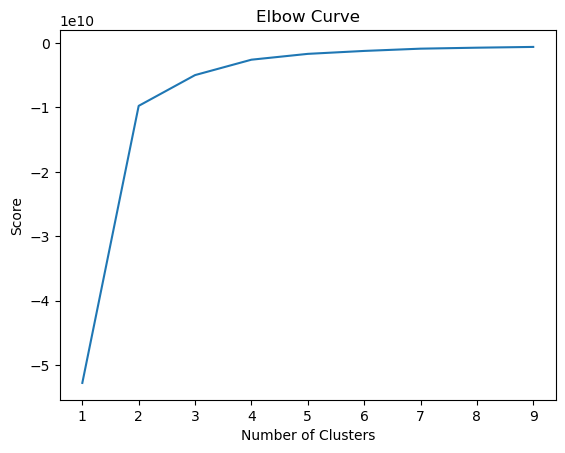

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a jump from two to three on the x-axis, and also slighlty from three to four, after that, the curve straightens out. This means that the optimal count for clusters is probably three

# k-means clustering

In [25]:
#create k-means object
kmeans = KMeans(n_clusters=3)


In [26]:
kmeans.fit(df)

C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Dan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df . head()

Total      Coal       Oil  Gas    Cement  Flaring  Other  Per Capita  \
210  0.413885  0.127115  0.268758  0.0  0.018012      0.0    0.0    0.048001   
211  0.490798  0.175872  0.293120  0.0  0.021806      0.0    0.0    0.055835   
212  0.688594  0.296784  0.362736  0.0  0.029074      0.0    0.0    0.076775   
213  0.706736  0.263808  0.392048  0.0  0.050880      0.0    0.0    0.077176   
214  0.838551  0.300448  0.476320  0.0  0.061783      0.0    0.0    0.089632   

     Life Expectancy  clusters  
210           32.535         0  
211           33.068         0  
212           33.547         0  
213           34.016         0  
214           34.494         0

In [30]:
df['clusters'].value_counts()

0    11719
2       94
1       49
Name: clusters, dtype: int64

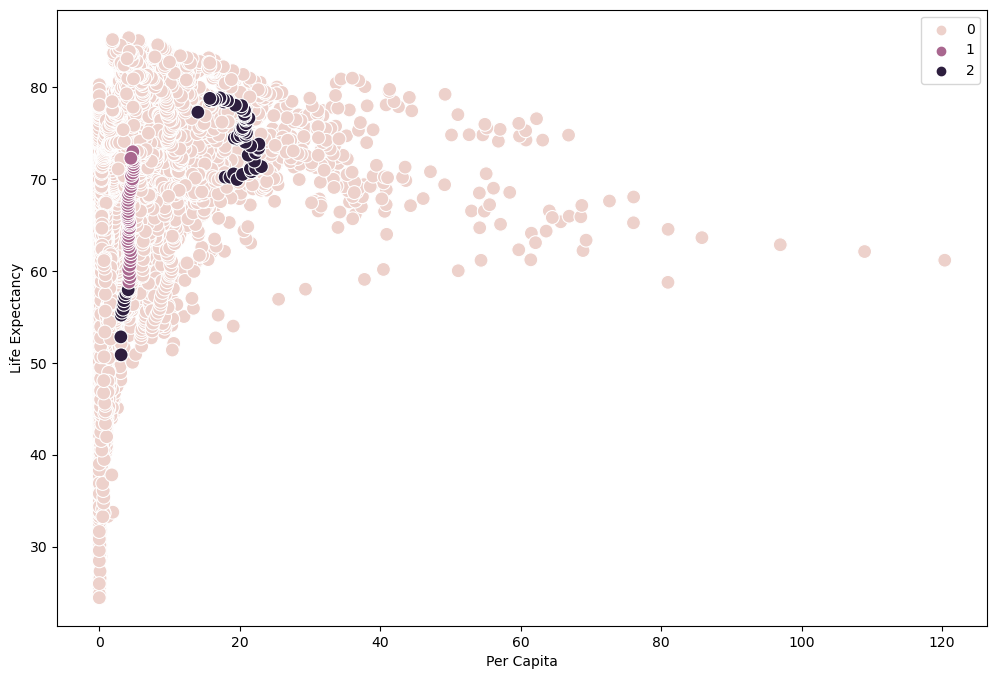

In [31]:
# Plot the clusters for the "Per Capita" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Per Capita'], y=df['Life Expectancy'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Per Capita') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

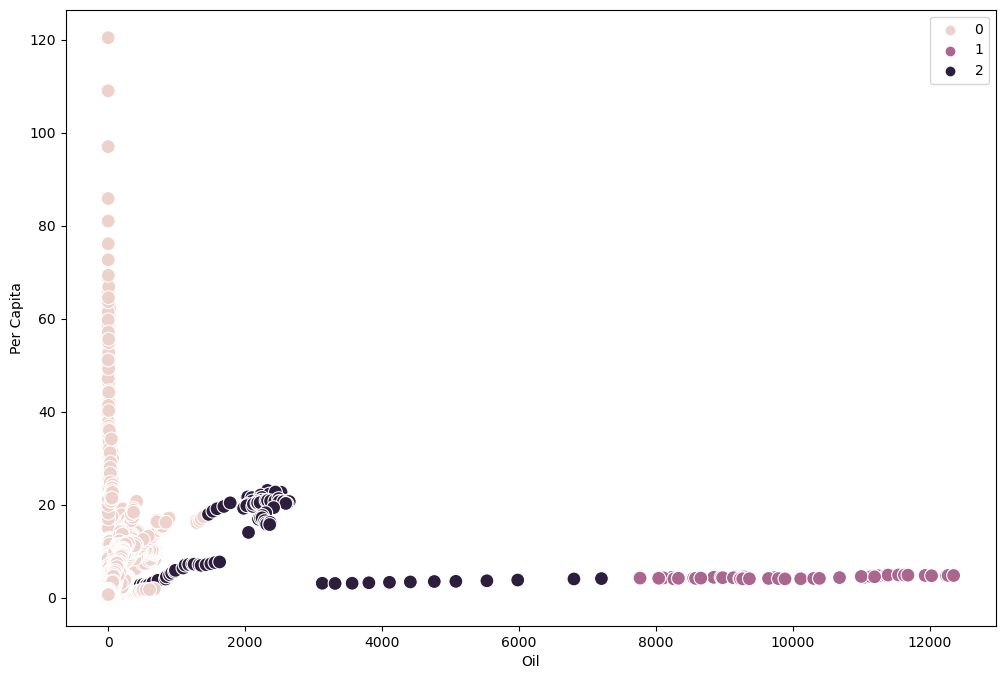

In [32]:
# Plot the clusters for the "Oil" and "Per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Oil'], y=df['Per Capita'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Oil') 
plt.ylabel('Per Capita') 
plt.show()

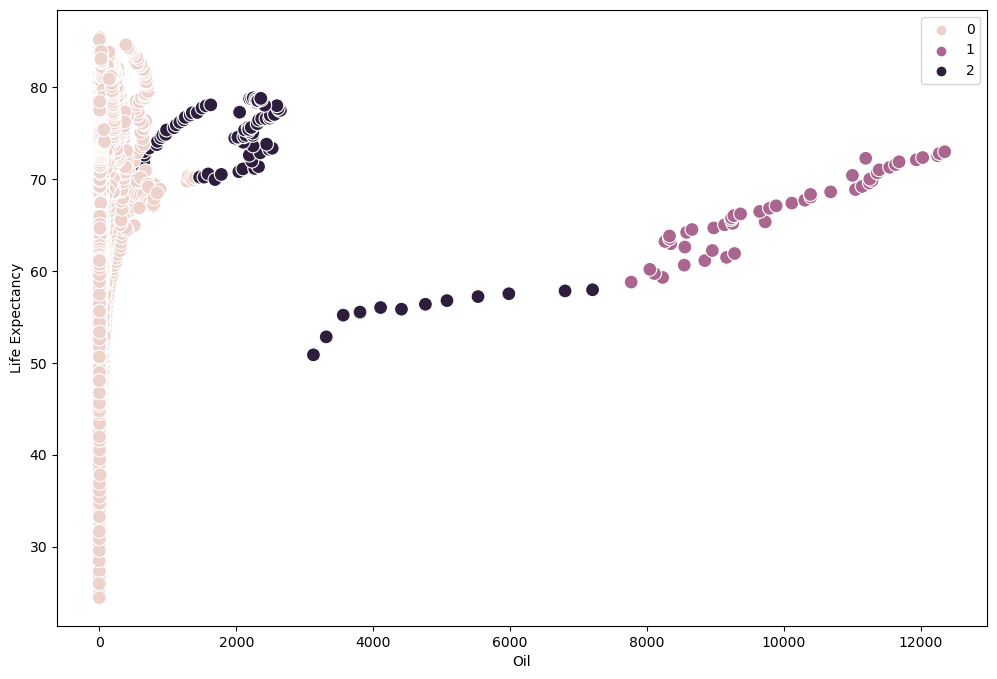

In [33]:
# Plot the clusters for the "Oil" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Oil'], y=df['Life Expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Oil') 
plt.ylabel('Life Expectancy') 
plt.show()

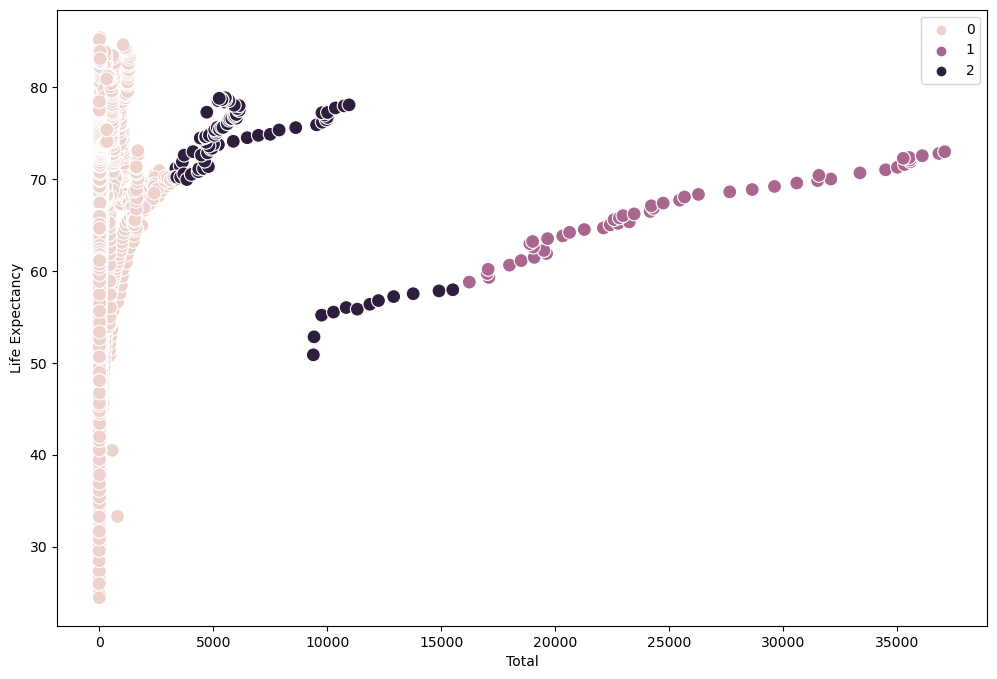

In [34]:
# Plot the clusters for the "Total" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total'], y=df['Life Expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total') 
plt.ylabel('Life Expectancy') 
plt.show()

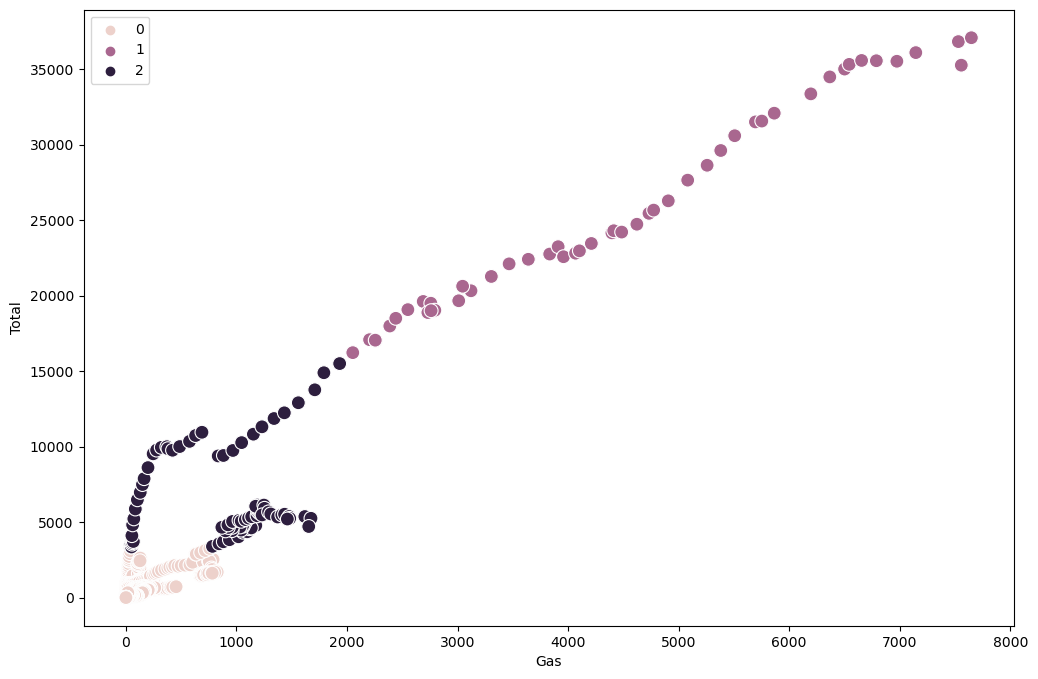

In [35]:
# Plot the clusters for the "Gas" and "Total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Gas'], y=df['Total'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Gas') 
plt.ylabel('Total') 
plt.show()

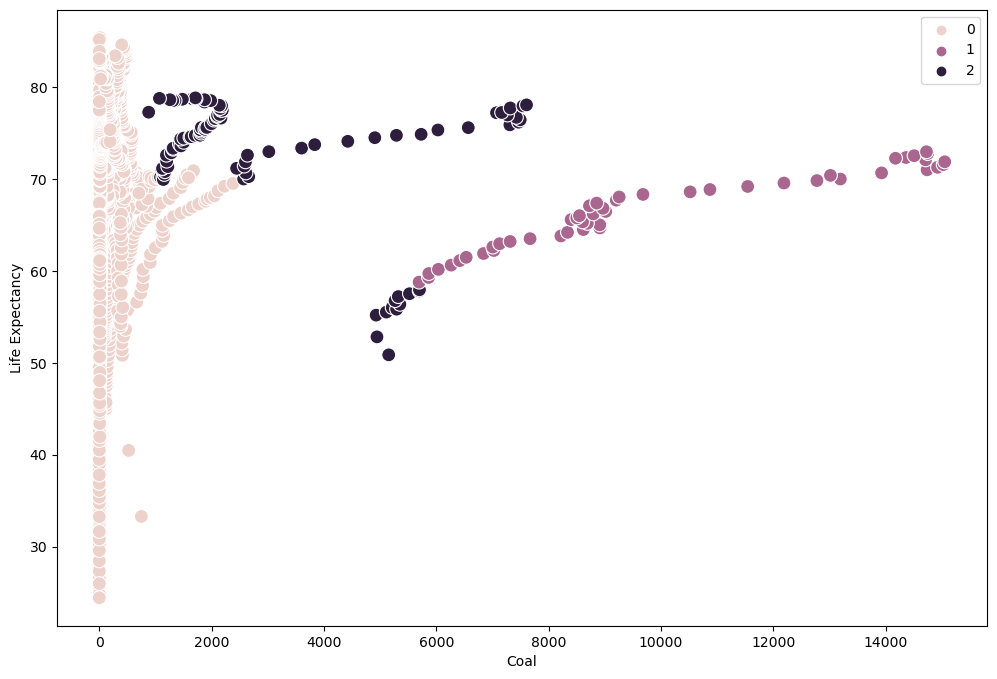

In [36]:
# Plot the clusters for the "Coal" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Coal'], y=df['Life Expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Coal') 
plt.ylabel('Life Expectancy') 
plt.show()

In [37]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
df.groupby('cluster').agg({'Oil':['mean', 'median'], 
                         'Coal':['mean', 'median'], 
                         'Per Capita':['mean', 'median'],
                          'Life Expectancy':['mean', 'median']})

Oil                      Coal              Per Capita  \
                    mean       median         mean       median       mean   
cluster                                                                      
dark purple  2212.717253  2207.259012  3081.068828  2083.025811  13.696315   
pink           29.868363     3.315348    27.373907     0.062288   4.399770   
purple       9956.253453  9723.429325  9977.035384  8909.615731   4.385488   

                       Life Expectancy             
                median            mean     median  
cluster                                            
dark purple  17.419982       72.586606  74.763927  
pink          1.717992       64.142068  66.816220  
purple        4.307585       66.606210  66.472549

# Scatterplot observations

In the first scatterplot (Per Capita x Life Expectancy) we can see that the pink cluster includes all the highest and lowest values for both variables and is the most numerous. The purple cluster is concentrated in an almost vertical pattern where emissions per capita are low and life expectancy is medium. I would image this cluster represents developing countries. Finally, the dark purple cluster seems to be split into to locations, relatively high emissions per capita and quite high life expectancy, and low emissions and low life expectancy. 

In the second plot, (Oil x Per Capita) the pink cluster is located where there is low oil production and low to high emissions per capita which could mean the population is low or their emissions come from other sources. The purple cluster is located at high oil emissions and low emissions per capita, which I imagine could represent countries with high oil production and a large population, or high oil production and not many other sources of emissions. Finally, the dark purple cluster is situated between the two others. 

In the oil x life expectancy plot, the pink cluster is representing countries with low amounts of emissions from oil and the whole range of low to high life expectancy. The purple cluster is located where oil production is high and life expectancy is medium, so perhaps developing countries or oil rich countries, and the dark purple cluster is split again, where there is medium oil emissions and medium life expectancy and also low oil emissions and high life expectancy, most likely representing developed countries who perhaps get their oil from other countries. 

The total x life expectancy scatterplot follows a similar pattern to the previous one. 

The gas x total scatterplot has the pink cluster located where gas emissions are low and total emissions are low. So either countries with no gas stores or other emissions, the purple cluster is representing countries that produce a lot of gas emissions and have high total emissions, so perhaps the gas is a big contributor to these emissions. Finally the dark purple group is in the middle of the other two. 
Coal x life expectancy is a bit similar to the oil and life expectancy plot. The pink cluster is representing countries with low emissions for coal and the whole range of low to high life expectancy. So poor countries that produce no coal and have low life expectancy to developed countries that that don’t produce coal and have high life expectancy. The purple group is representing high coal emissions and medium life expectancy, so most likely developing countries who still produce a lot of coal, and finally the dark purple cluster is representing countries with medium emissions from coal and medium to high life expectancy, so probably countries that are further along the developing spectrum and have achieved higher life expectancy but haven’t yet fully reduced coal production.


# Descriptive stats observations

The pink group seems to represent countries with lowest emissions overall and per capita and a medium life expectancy though lowest mean life expectancy of the 3, so maybe looking at poor countries with no natural resources, and more well off countries with low emissions. 
The purple group has higher coal and oil emissions than the other two but not so high emissions per capita, and a medium life expectancy, so perhaps these are developing countries. 
Finally, the dark purple group has low oil and coal emissions, but much higher emissions per capita than the other 2. It also has a much better life expectancy so must be representing developed countries, that have lower populations or higher emissions from other sources, but also perhaps also developing countries that are nearly developed but still producing a lot of emissions per capita. 

These results could be useful because they potentially agree with the hypothesis that countries get to a point where they can stop producing so many emissions and the life expectancy can remain high. It gives a foundation to look further in to this data. 